In [ ]:
import numpy as np
import pandas as pd

In [14]:
import seaborn as sns

In [25]:
traindf=pd.read_csv('Train_Data.csv')

In [6]:
sample=pd.read_csv('Sample_Submission.csv')

In [17]:
test=pd.read_csv('Test_Data.csv')

In [19]:
test.isnull().sum()

SEQN        2
RIAGENDR    2
PAQ605      1
BMXBMI      1
LBXGLU      1
DIQ010      1
LBXGLT      2
LBXIN       1
dtype: int64

In [9]:
sample['age_group'].describe

<bound method NDFrame.describe of 0      0
1      0
2      0
3      0
4      0
      ..
307    1
308    1
309    1
310    1
311    1
Name: age_group, Length: 312, dtype: int64>

In [5]:
traindf.describe

<bound method NDFrame.describe of          SEQN  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN  \
0     73564.0       2.0     2.0    35.7   110.0     2.0   150.0  14.91   
1     73568.0       2.0     2.0    20.3    89.0     2.0    80.0   3.85   
2     73576.0       1.0     2.0    23.2    89.0     2.0    68.0   6.14   
3     73577.0       1.0     2.0    28.9   104.0     NaN    84.0  16.15   
4     73580.0       2.0     1.0    35.9   103.0     2.0    81.0  10.92   
...       ...       ...     ...     ...     ...     ...     ...    ...   
1961  83711.0       2.0     2.0    33.5   100.0     2.0    73.0   6.53   
1962  83712.0       1.0     2.0    30.0    93.0     2.0   208.0  13.02   
1963  83713.0       1.0     2.0    23.7   103.0     2.0   124.0  21.41   
1964  83718.0       2.0     2.0    27.4    90.0     2.0   108.0   4.99   
1965  83727.0       1.0     2.0    24.5     NaN     2.0   108.0   3.76   

     age_group  
0        Adult  
1        Adult  
2        Adult  
3        

feature eng


<Axes: >

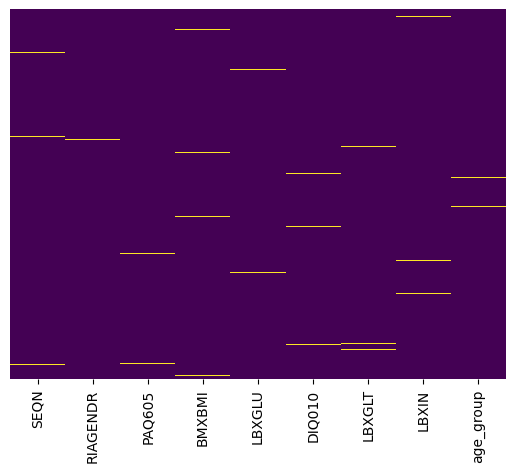

In [15]:
sns.heatmap(traindf.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [16]:
traindf.isnull().sum()

SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

In [20]:
traindf.isna().sum()

SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

In [10]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Adult', 'Senior']])
traindf['age_group'] = encoder.fit_transform(traindf[['age_group']]).astype('int64')

ValueError: Found unknown categories [nan] in column 0 during fit

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [24]:
traindf[traindf['age_group'].isnull()]

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
208,74670.0,2.0,2.0,27.3,118.0,3.0,154.0,14.44,NaN
360,75492.0,1.0,2.0,29.3,109.0,2.0,90.0,9.03,NaN
381,75621.0,2.0,2.0,26.9,99.0,2.0,180.0,25.45,NaN
562,76539.0,2.0,2.0,19.5,86.0,2.0,108.0,3.78,NaN
684,77144.0,2.0,1.0,22.2,100.0,2.0,92.0,9.63,NaN
690,77178.0,2.0,2.0,28.1,166.0,2.0,320.0,8.48,NaN
811,77748.0,1.0,2.0,23.9,91.0,2.0,101.0,4.76,NaN
895,78199.0,2.0,2.0,32.5,104.0,2.0,79.0,9.65,NaN
1049,79060.0,2.0,2.0,26.7,80.0,2.0,80.0,9.81,NaN
1244,80146.0,1.0,1.0,28.2,92.0,2.0,74.0,6.29,NaN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

traindf_encoded = traindf.copy()
encoder = OrdinalEncoder(categories=[['Adult', 'Senior']])
mask = traindf_encoded['age_group'].notnull()
traindf_encoded.loc[mask, 'age_group'] = encoder.fit_transform(
    traindf_encoded.loc[mask, ['age_group']]
).astype('int64')


In [27]:
traindf_encoded = traindf_encoded.drop(columns='SEQN')


In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.utils.multiclass import type_of_target

def impute_column(df, target_col):
    df_copy = df.copy()
    
    train_df = df_copy[df_copy[target_col].notnull()].dropna()

    if train_df.empty:
        print(f"Skipping {target_col} — no complete rows to train on.")
        return df_copy

    predict_df = df_copy[df_copy[target_col].isnull()]
    if predict_df.empty:
        return df_copy  
    
    predict_features = predict_df.drop(columns=[target_col]).dropna()
    predict_index = predict_features.index

    if predict_features.empty:
        print(f"Skipping {target_col} — no complete prediction rows.")
        return df_copy
    common_cols = train_df.drop(columns=[target_col]).columns.intersection(predict_features.columns)
    X_train = train_df[common_cols]
    y_train = train_df[target_col]
    X_pred = predict_features[common_cols]

    y_train = pd.to_numeric(y_train, errors='coerce')
    y_train = y_train.astype('float64') 

    target_type = type_of_target(y_train)
    if target_type == "binary" or target_type == "multiclass":
        y_train = y_train.astype('int64')
        model = RandomForestClassifier()
    elif target_type == "continuous":
        model = RandomForestRegressor()
    else:
        raise ValueError(f"Unsupported target type for {target_col}: {target_type}")

    
    model.fit(X_train, y_train)
    preds = model.predict(X_pred)

    
    df_copy.loc[predict_index, target_col] = preds
    return df_copy


In [31]:
imputed_df = traindf_encoded.copy()
cols_to_impute = ['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN', 'age_group']

for col in cols_to_impute:
    imputed_df = impute_column(imputed_df, col)


In [40]:
imputed_df.isna().sum()

RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
age_group    0
dtype: int64

In [35]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score
from xgboost import XGBClassifier

In [ ]:

X = imputed_df.drop(columns='age_group')
y = imputed_df['age_group'].astype(int)  


In [42]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params,
    scoring='f1',
    n_jobs=-1,
    cv=cv,
    verbose=1
)

grid.fit(X, y)

# best modelafter tuning
best_model = grid.best_estimator_
print("Best Parameters:\n", grid.best_params_)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters:
 {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:27:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(best_model, X, y, cv=cv)

print("\nClassification Report:")
print(classification_report(y, y_pred))
print("F1 Score:", f1_score(y, y_pred))


c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:29:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:29:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:29:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:29:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1652
           1       0.47      0.18      0.26       314

    accuracy                           0.84      1966
   macro avg       0.66      0.57      0.59      1966
weighted avg       0.80      0.84      0.81      1966

F1 Score: 0.2648401826484018


In [ ]:
testdf = pd.read_csv('Test_Data.csv')
testdf.drop(columns='SEQN', inplace=True)
testdf_encoded = testdf.copy()
for col in testdf_encoded.columns:
    if testdf_encoded[col].isnull().sum() > 0:
        testdf_encoded = impute_column(testdf_encoded, col)


In [47]:
test_preds = best_model.predict(testdf_encoded)


In [48]:
submission = pd.DataFrame({'age_group': test_preds.astype(int)})
submission.to_csv('submission.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier

def load_data(train_path, test_path):
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)
    return train, test


def clean_data(df):
    num_feats = ['PAQ605','BMXBMI','LBXGLU','LBXGLT','LBXIN']
    df_copy = df.copy()
    df_iso = df_copy[num_feats].copy()
    for col in num_feats:
        df_iso[col] = df_iso[col].fillna(df_iso[col].median())
    mask = IsolationForest(contamination=0.02, random_state=42).fit_predict(df_iso)
    

    for col in num_feats:
        if col in df_copy.columns:
            low, high = df_copy[col].quantile([0.01, 0.99])
            df_copy[col] = df_copy[col].clip(lower=low, upper=high)

    return df_copy


def make_pipeline():
    num_feats = ['PAQ605','BMXBMI','LBXGLU','LBXGLT','LBXIN','BMI_GLU','INSULIN_RATIO','GLU_TOL_RATIO','INSULIN_GLU_RATIO','ACTIVITY_DIABETES','HIGH_GLUCOSE','HIGH_BMI','LOW_ACTIVITY','INSULIN_DEFICIENT']
    cat_feats = ['RIAGENDR','DIQ010']

    num_pipe = Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('scaler', StandardScaler())
    ])
    cat_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ])

    from sklearn.compose import ColumnTransformer
    preprocessor = ColumnTransformer([
        ('num', num_pipe, num_feats),
        ('cat', cat_pipe, cat_feats)
    ])

    def preprocess(X, fit=True):
        return preprocessor.fit_transform(X) if fit else preprocessor.transform(X)

    return preprocessor, preprocess


def train_and_evaluate(X, y, model, params=None):
    if params:
        grid = GridSearchCV(model, params, cv=5, scoring='roc_auc', n_jobs=-1, error_score='raise')
        grid.fit(X, y)
        best = grid.best_estimator_
    else:
        best = model
        from sklearn.utils.class_weight import compute_sample_weight
        sample_weights = compute_sample_weight(class_weight='balanced', y=y)
        best.fit(X, y, sample_weight=sample_weights)
    y_pred = best.predict(X)
    print(classification_report(y, y_pred))
    print("ROC AUC:", roc_auc_score(y, best.predict_proba(X)[:,1]))
    return best

def cross_val_predict_average(model, X, y, X_test, folds=5):
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    test_preds = np.zeros((X_test.shape[0],))
    for train_idx, _ in skf.split(X, y):
        X_tr, y_tr = X[train_idx], y[train_idx]
        model_ = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
        model_.fit(X_tr, y_tr)
        test_preds += model_.predict_proba(X_test)[:,1] / folds
    return test_preds

if __name__ == '__main__':
    train_df, test_df = load_data('train.csv', 'test.csv')

    
    for df in [train_df, test_df]: 
        df['BMI_GLU'] = df['BMXBMI'] * df['LBXGLU']
        df['INSULIN_RATIO'] = df['LBXIN'] / (df['LBXGLU'] + 1)
        df['GLU_TOL_RATIO'] = df['LBXGLU'] / (df['LBXGLT'] + 1)
        df['INSULIN_GLU_RATIO'] = df['LBXIN'] / (df['LBXGLU'] + 1)
        df['ACTIVITY_DIABETES'] = df['PAQ605'].fillna(0) * df['DIQ010'].fillna(0)
        df['HIGH_GLUCOSE'] = (df['LBXGLU'] > 140).astype(int)
        df['HIGH_BMI'] = (df['BMXBMI'] > 30).astype(int)
        df['LOW_ACTIVITY'] = (df['PAQ605'] == 2).astype(int)
        df['INSULIN_DEFICIENT'] = (df['LBXIN'] < 5).astype(int)

    train_df = clean_data(train_df)
    test_df = clean_data(test_df)  

    train_df = train_df.dropna(subset=['age_group'])
    train_df['age_group'] = train_df['age_group'].map({'Adult': 0, 'Senior': 1})

    X_train_full = train_df.drop(['SEQN', 'age_group'], axis=1)
    y_train_full = train_df['age_group'].astype(int)
    X_test_feat = test_df.drop(['SEQN'], axis=1)

    preprocessor, preprocess_fn = make_pipeline()
    X_train_trans = preprocess_fn(X_train_full, fit=True)
    X_test_trans = preprocess_fn(X_test_feat, fit=False)

    X_train_trans = np.nan_to_num(X_train_trans)
    X_test_trans = np.nan_to_num(X_test_trans)

    X_tr, X_val, y_tr, y_val = train_test_split(
        X_train_trans, y_train_full, test_size=0.2, stratify=y_train_full, random_state=42
    )

    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_params = {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }

    print("Training XGBoost...")
    best_model = train_and_evaluate(X_tr, y_tr, xgb, xgb_params)

    print("Validation Metrics:")
    y_val_pred = best_model.predict(X_val)
    print(classification_report(y_val, y_val_pred))
    print("ROC AUC:", roc_auc_score(y_val, best_model.predict_proba(X_val)[:,1]))

    print("Generating ensemble prediction on test set...")
    test_probs = cross_val_predict_average(best_model, X_train_trans, y_train_full.to_numpy(), X_test_trans, folds=5)
    test_preds = (test_probs > 0.5).astype(int)

    submission = pd.DataFrame({
        'age_group': test_preds
    })
    submission.to_csv('submission3.csv', index=False)
    print("submission.csv created")
